In [22]:
mpi2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_128_mpi_n2_28771_1.txt'
mpi4 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_128_mpi_n4_28748_1.txt'
mpi6 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_128_mpi_n6_28751_1.txt'
mpi8 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_128_mpi_n8_28640_1.txt'
mpi16 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_128_mpi_n8x2_28785_3.txt'

mpirr2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n2_17779.txt'
mpirr4 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n4_17753.txt'
mpirr6 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n6_20693.txt'
mpirr8 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n8_17007.txt'
mpirr16 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n8x2_17780.txt'


In [23]:
def parse_mpi_files(file1, file2, file3, file4, file5):
    blockSizes = {}
    with open(file1, 'r') as f:
        line1 = f.readlines()
    
    with open(file2, 'r') as f:
        line2 = f.readlines()
    
    with open(file3, 'r') as f:
        line3 = f.readlines()

    with open(file4, 'r') as f:
        line4 = f.readlines()

    with open(file5, 'r') as f:
        line5 = f.readlines()

    for i in range(0, len(line1)):
        if 'decompression' in line1[i]:
            continue
        elif 'compression' in line1[i] and 'decompression' not in line1[i]:
            t = int(line1[i].split(' ')[3])
            time1 = float(line1[i+1].split(' ')[2])
            time2 = float(line2[i+1].split(' ')[2])
            time3 = float(line3[i+1].split(' ')[2])
            time4 = float(line4[i+1].split(' ')[2])
            time5 = float(line5[i+1].split(' ')[2])
            time1 = round(time1, 1)
            time2 = round(time2, 1)
            time3 = round(time3, 1)
            time4 = round(time4, 1)
            time5 = round(time5, 1)
            blockSizes[t] = (time1, time2, time3, time4, time5)

    return blockSizes
            


In [24]:
blockSizes = parse_mpi_files(mpi2, mpi4, mpi6, mpi8, mpi16)
blockSizesrr = parse_mpi_files(mpirr2, mpirr4, mpirr6, mpirr8, mpirr16)

In [25]:
print(blockSizes)

{2: (4003.8, 2913.3, 2187.2, 1910.2, 1539.8), 4: (4009.7, 2727.3, 2255.9, 1919.2, 1567.9), 8: (3986.1, 2731.9, 2228.8, 1922.0, 1550.1), 16: (4130.5, 2730.3, 2602.4, 1883.1, 1932.5), 32: (4068.6, 2720.1, 2707.9, 2680.8, 2650.3), 64: (4408.8, 4173.2, 4138.5, 4025.2, 4062.8)}


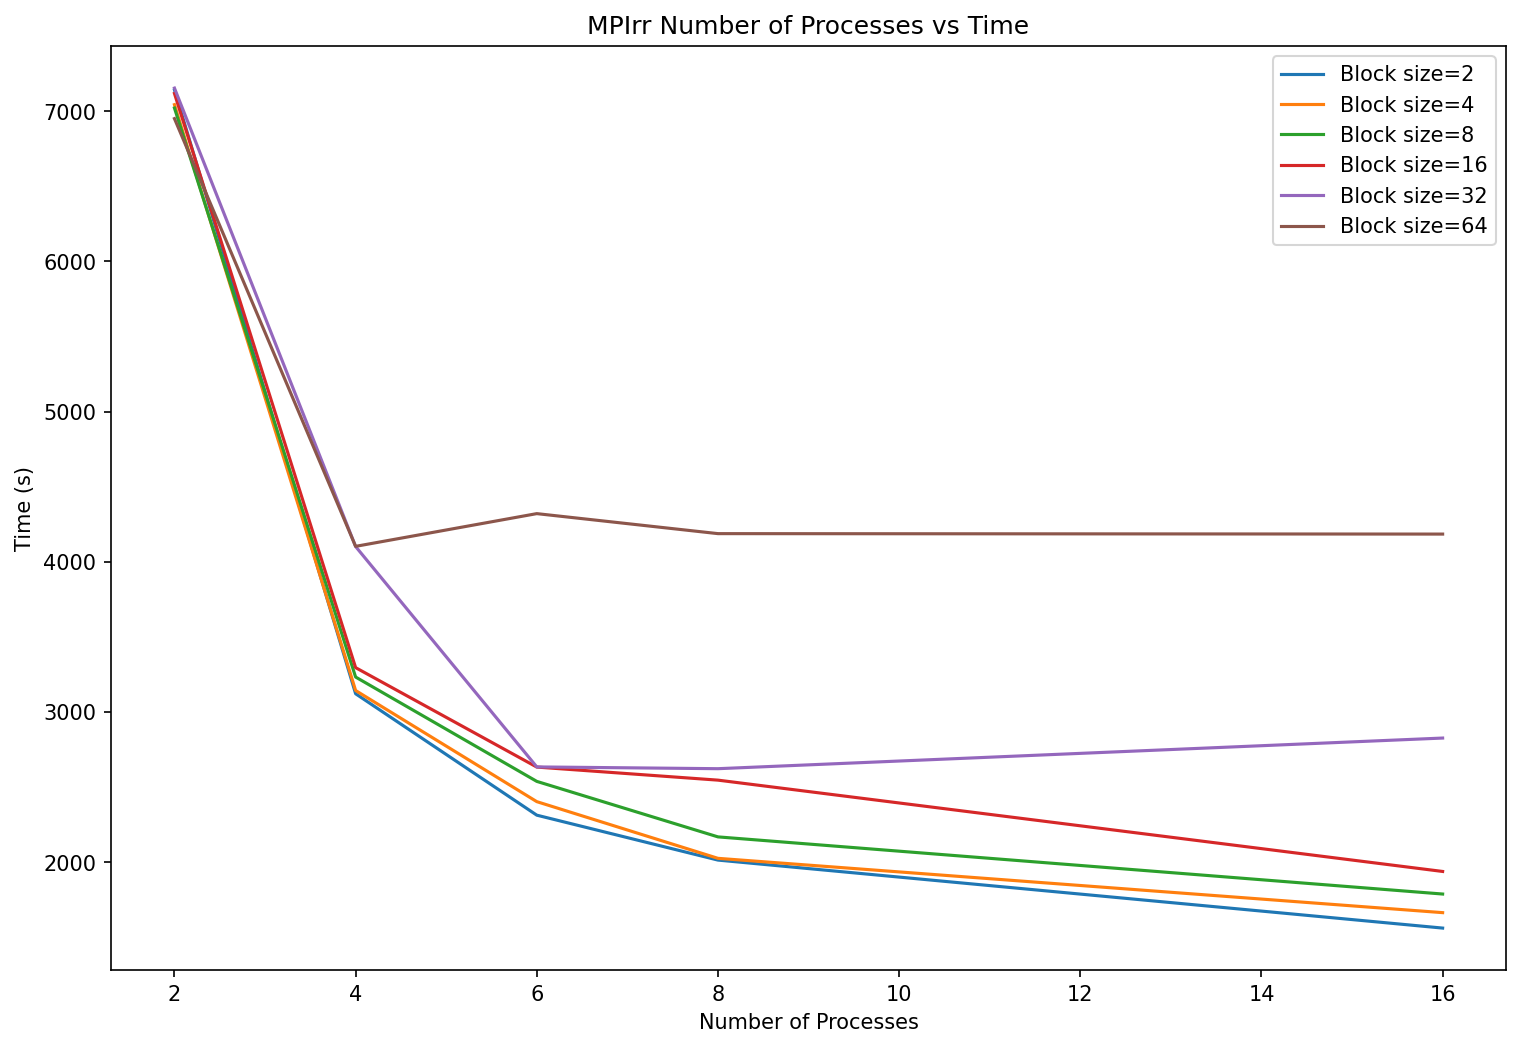

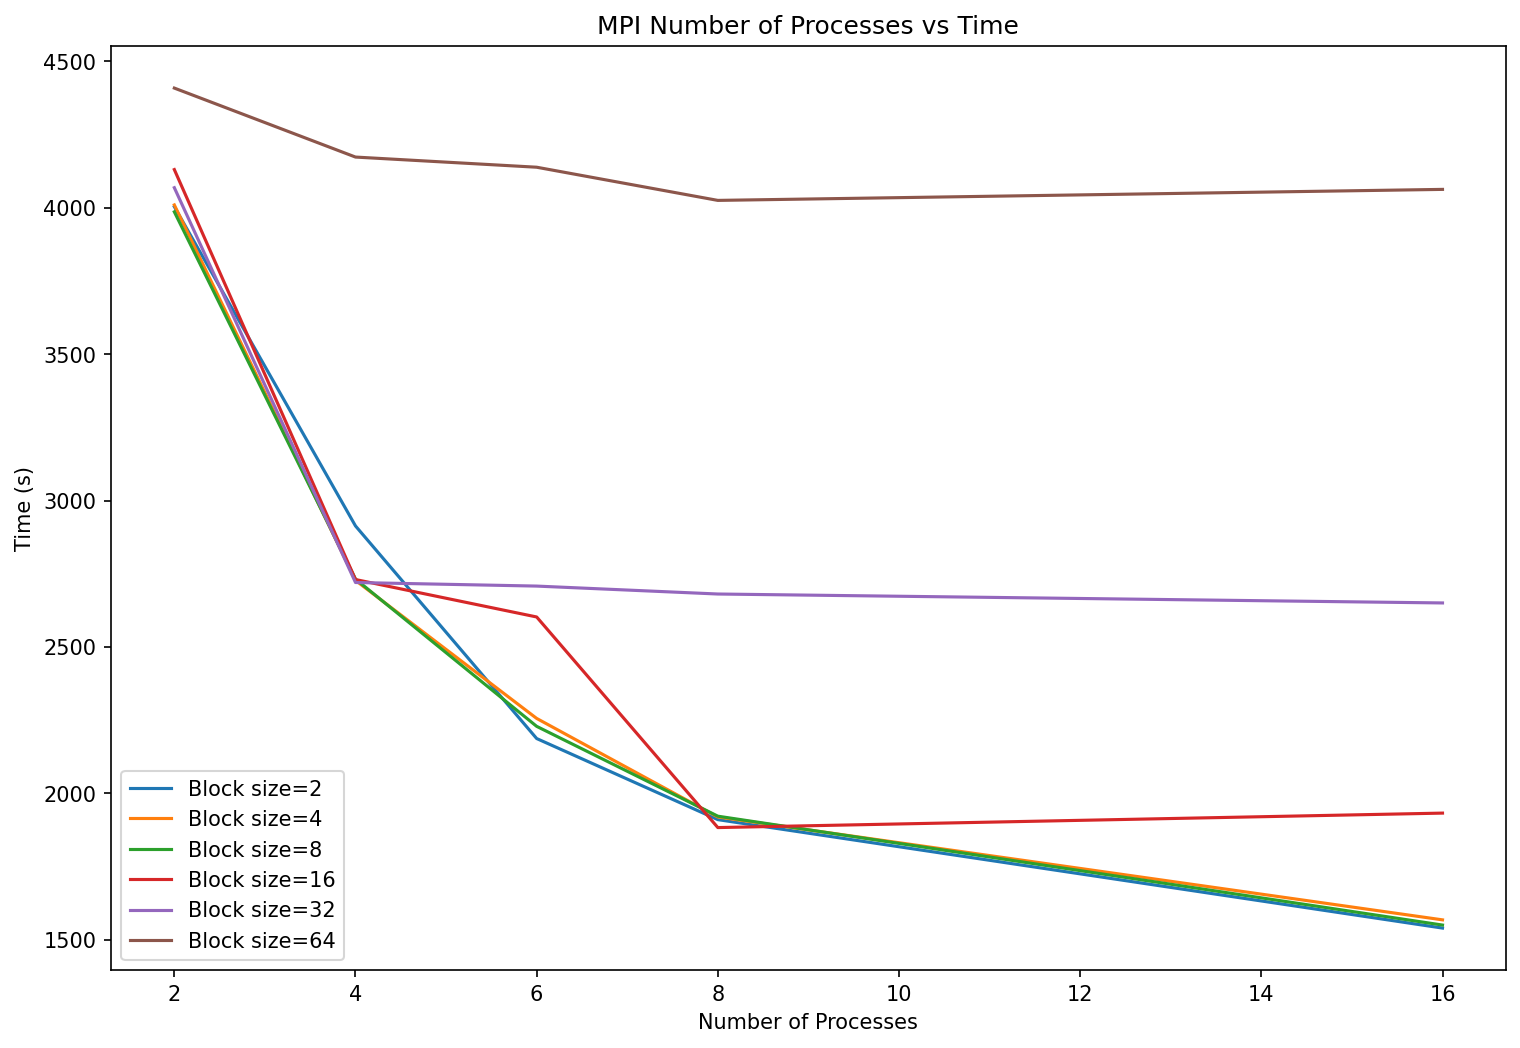

In [26]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Iterate over blockSizes to plot each tuple
for block_size, times in blockSizesrr.items():
    ax.plot(processes, times, label=f'Block size={block_size}')

ax.set_xlabel('Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_title('MPIrr Number of Processes vs Time')
ax.legend()
plt.show()

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Iterate over blockSizes to plot each tuple
for block_size, times in blockSizes.items():
    ax.plot(processes, times, label=f'Block size={block_size}')

ax.set_xlabel('Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_title('MPI Number of Processes vs Time')
ax.legend()
plt.show()

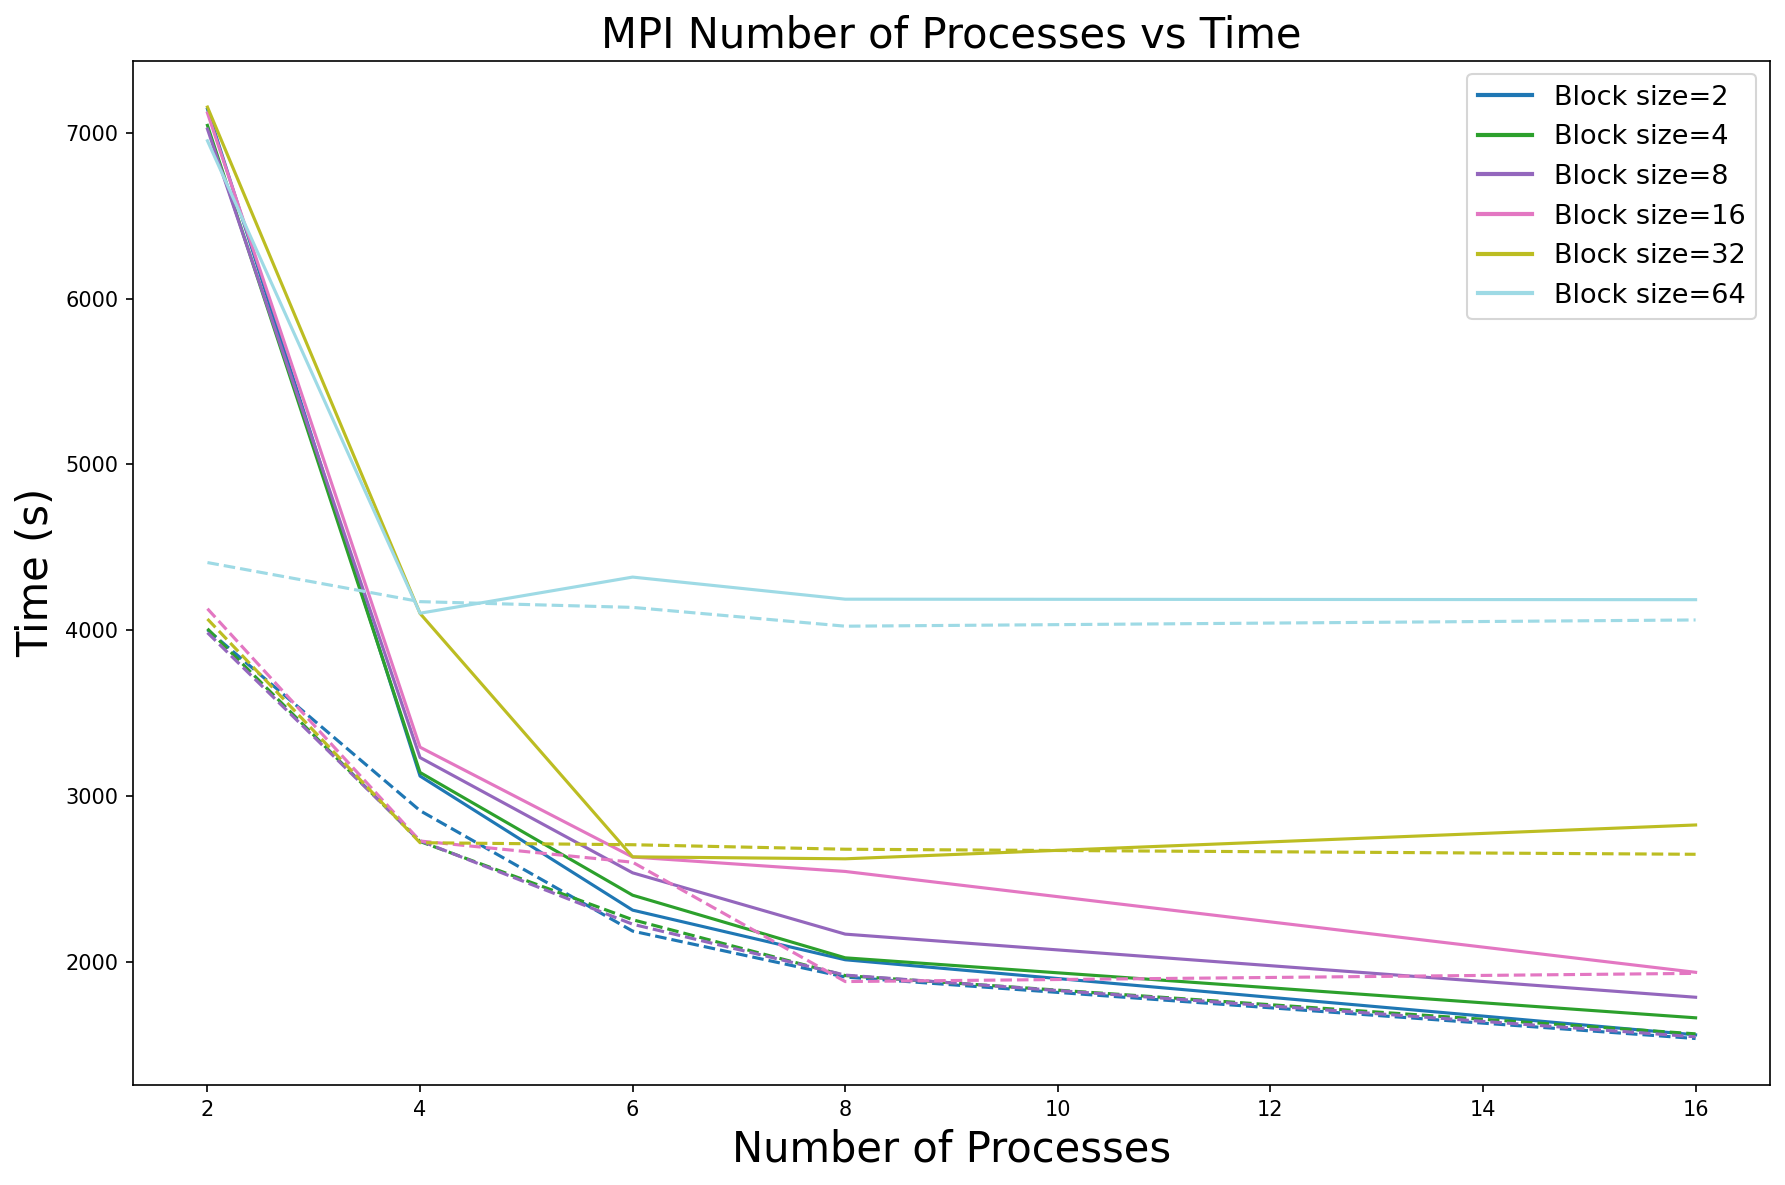

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming blockSizes and blockSizesrr are defined

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Define a color map for the block sizes using a more distinguishable colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(blockSizes)))

# Plot the lines with different line styles but same color for the same block size
for i, (block_size, times) in enumerate(blockSizesrr.items()):
    ax.plot(processes, times, label=f'Block size={block_size}', color=colors[i], linestyle='solid')

for i, (block_size, times) in enumerate(blockSizes.items()):
    ax.plot(processes, times, color=colors[i], linestyle='dashed')

# Create a custom legend to show only the colors for different block sizes
handles = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(len(blockSizes))]
labels = [f'Block size={block_size}' for block_size in blockSizes.keys()]
ax.legend(handles, labels, fontsize=13)

ax.set_xlabel('Number of Processes', fontsize=20)
ax.set_ylabel('Time (s)', fontsize=20)
ax.set_title('MPI Number of Processes vs Time', fontsize=20)

plt.tight_layout()
plt.show()

In [28]:
comp_times = blockSizes[2]
comp_timesrr = blockSizesrr[8]

In [29]:
comp_times

(4003.8, 2913.3, 2187.2, 1910.2, 1539.8)

In [30]:
sequential_time_comp = 6725

In [31]:
blockSizes[2][0]

4003.8

In [32]:
# calculate speedup, efficiency and scalability for all times, use blocksizesRR[2] as a reference for the scalability and sequential time for the sequential time
speedup = []
efficiency = []
scalability = []
speeduprr = []
efficiencyrr = []
scalabilityrr = []

for i in range(0, len(comp_times)):
    speedup.append(sequential_time_comp/comp_times[i])
    efficiency.append(speedup[i]/processes[i])
    scalability.append(sequential_time_comp/comp_times[i])
    speeduprr.append(sequential_time_comp/comp_timesrr[i])
    efficiencyrr.append(speeduprr[i]/processes[i])
    scalabilityrr.append(comp_timesrr[0]/comp_timesrr[i])

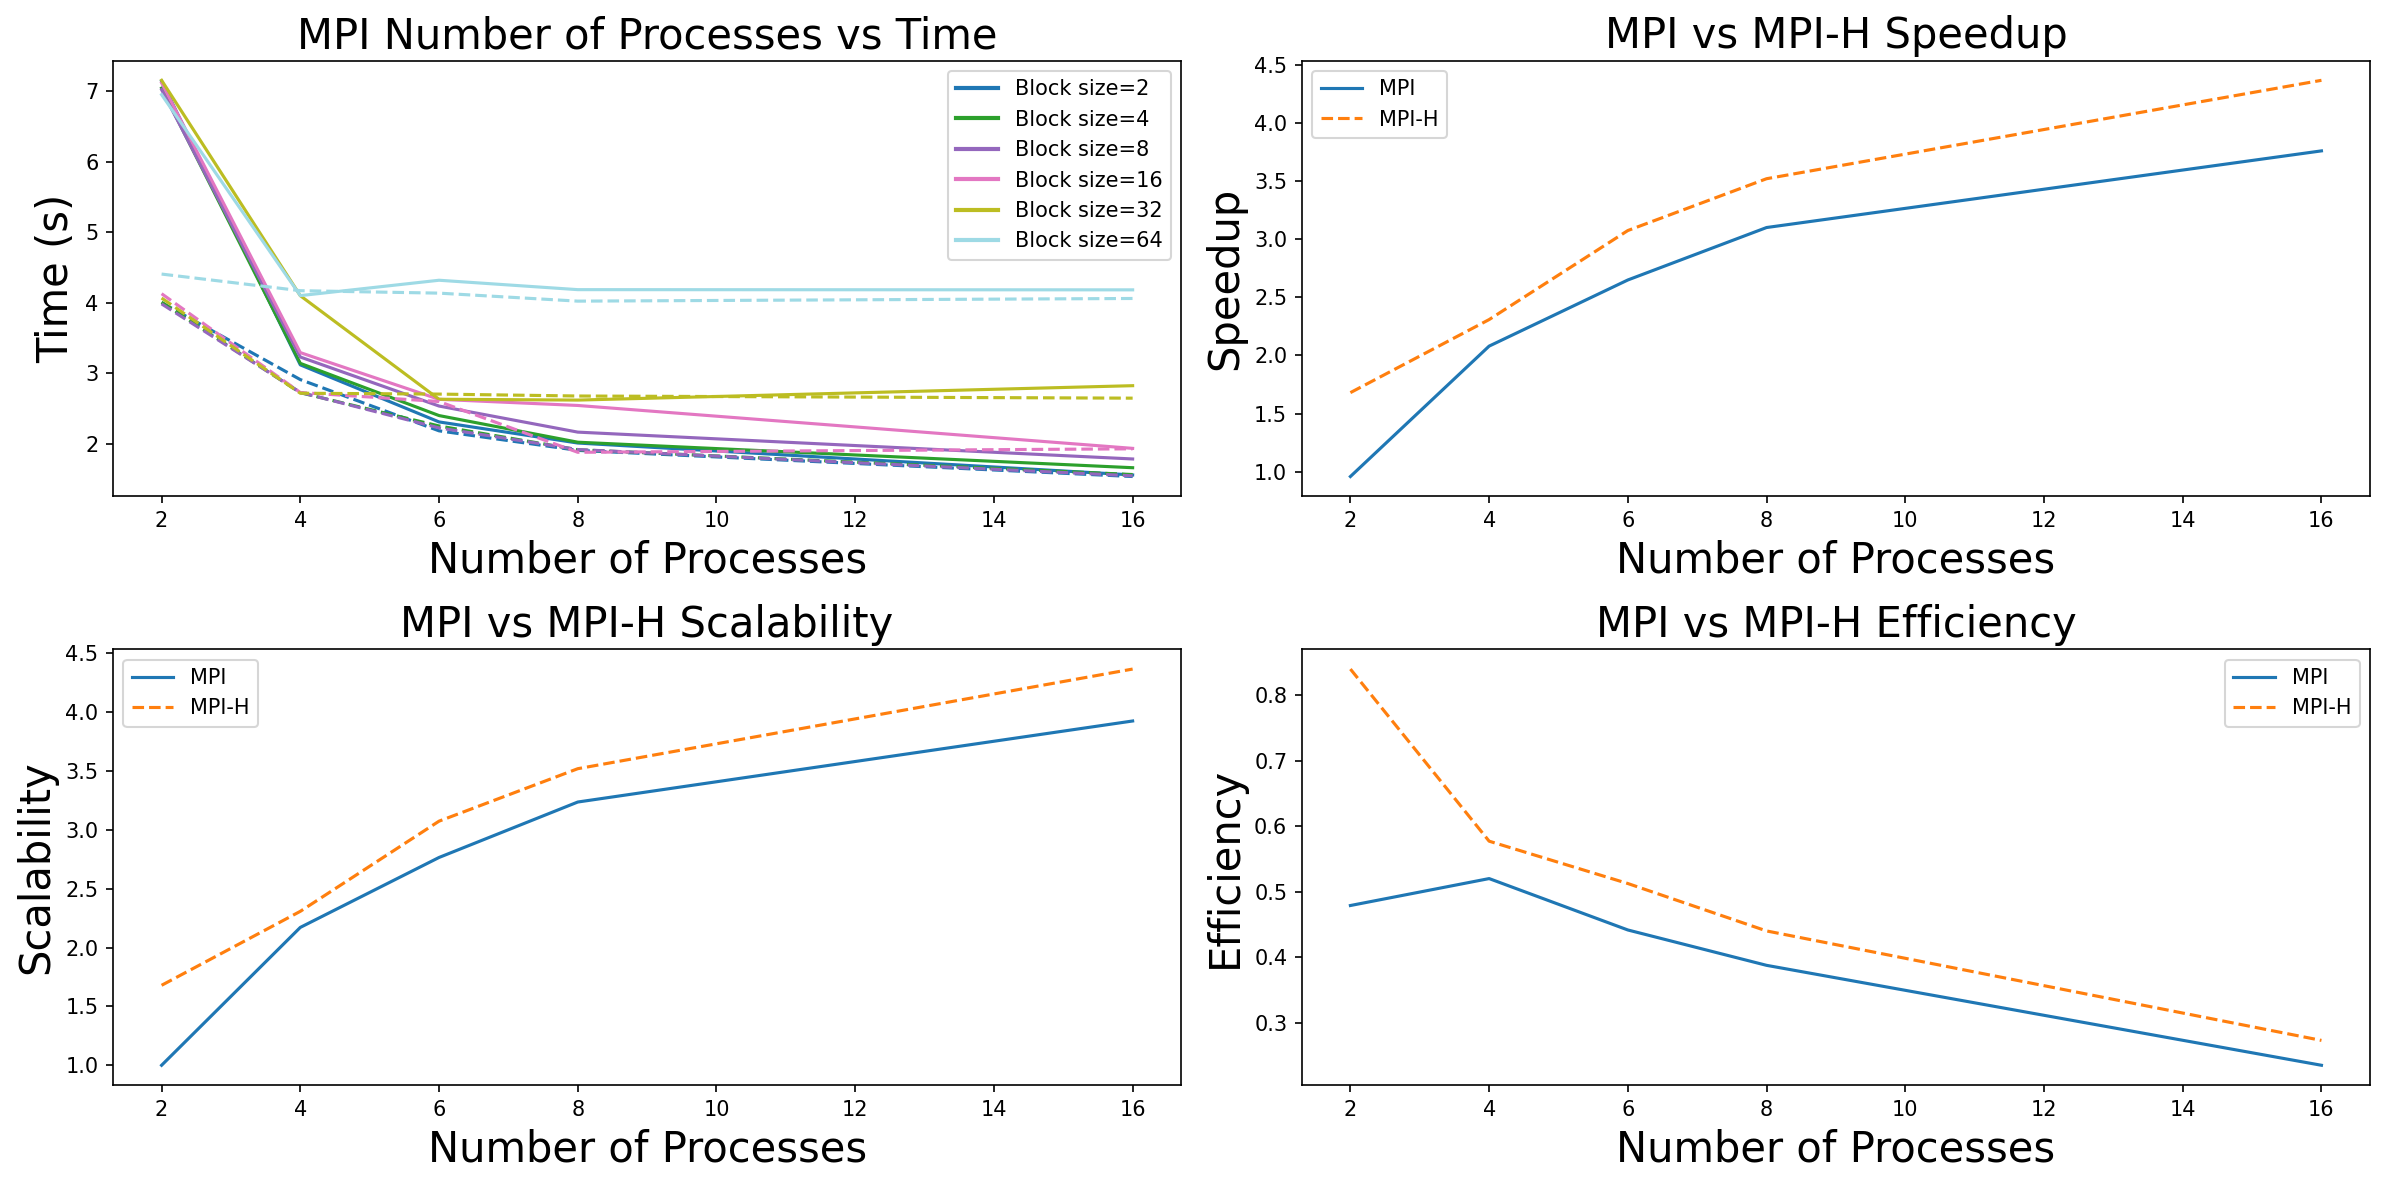

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming blockSizes, blockSizesrr, speedup, speeduprr, efficiency, efficiencyrr, scalability, and scalabilityrr are defined

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Define a color map for the block sizes using a more distinguishable colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(blockSizes)))

# Plot the time plot
for i, (block_size, times) in enumerate(blockSizesrr.items()):
    times_in_seconds = [t / 1000 for t in times]  # Convert milliseconds to seconds
    axs[0, 0].plot(processes, times_in_seconds, label=f'Block size={block_size}', color=colors[i], linestyle='solid')

for i, (block_size, times) in enumerate(blockSizes.items()):
    times_in_seconds = [t / 1000 for t in times]  # Convert milliseconds to seconds
    axs[0, 0].plot(processes, times_in_seconds, color=colors[i], linestyle='dashed')

# Create a custom legend to show only the colors for different block sizes
handles = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(len(blockSizes))]
labels = [f'Block size={block_size}' for block_size in blockSizes.keys()]
axs[0, 0].legend(handles, labels, fontsize=10)

axs[0, 0].set_xlabel('Number of Processes', fontsize=20)
axs[0, 0].set_ylabel('Time (s)', fontsize=20)
axs[0, 0].set_title('MPI Number of Processes vs Time', fontsize=20)

# Plot the speedup plot
axs[0, 1].plot(processes, speeduprr, label='MPI', linestyle='solid')
axs[0, 1].plot(processes, speedup, label='MPI-H', linestyle='dashed')

axs[0, 1].set_xlabel('Number of Processes', fontsize=20)
axs[0, 1].set_ylabel('Speedup', fontsize=20)
axs[0, 1].set_title('MPI vs MPI-H Speedup', fontsize=20)
axs[0, 1].legend()

# Plot the efficiency plot
axs[1, 1].plot(processes, efficiencyrr, label='MPI', linestyle='solid')
axs[1, 1].plot(processes, efficiency, label='MPI-H', linestyle='dashed')

axs[1, 1].set_xlabel('Number of Processes', fontsize=20)
axs[1, 1].set_ylabel('Efficiency', fontsize=20)
axs[1, 1].set_title('MPI vs MPI-H Efficiency', fontsize=20)
axs[1, 1].legend()

# Plot the scalability plot
axs[1, 0].plot(processes, scalabilityrr, label='MPI', linestyle='solid')
axs[1, 0].plot(processes, scalability, label='MPI-H', linestyle='dashed')

axs[1, 0].set_xlabel('Number of Processes', fontsize=20)
axs[1, 0].set_ylabel('Scalability', fontsize=20)
axs[1, 0].set_title('MPI vs MPI-H Scalability', fontsize=20)
axs[1, 0].legend()

plt.tight_layout()
plt.show()

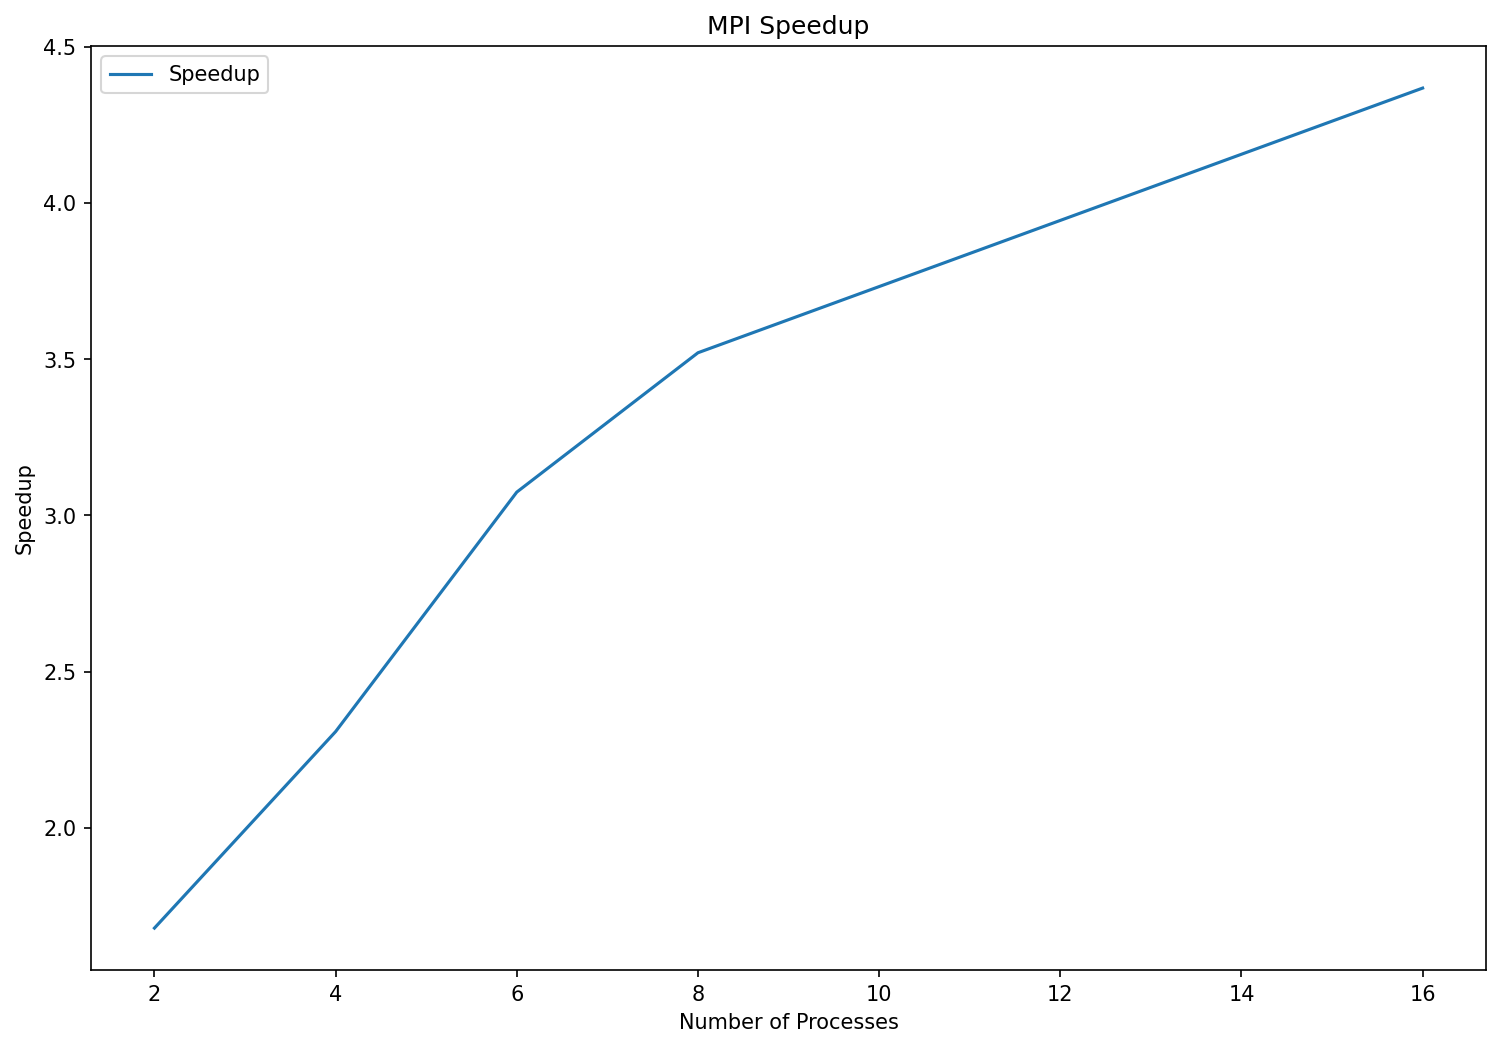

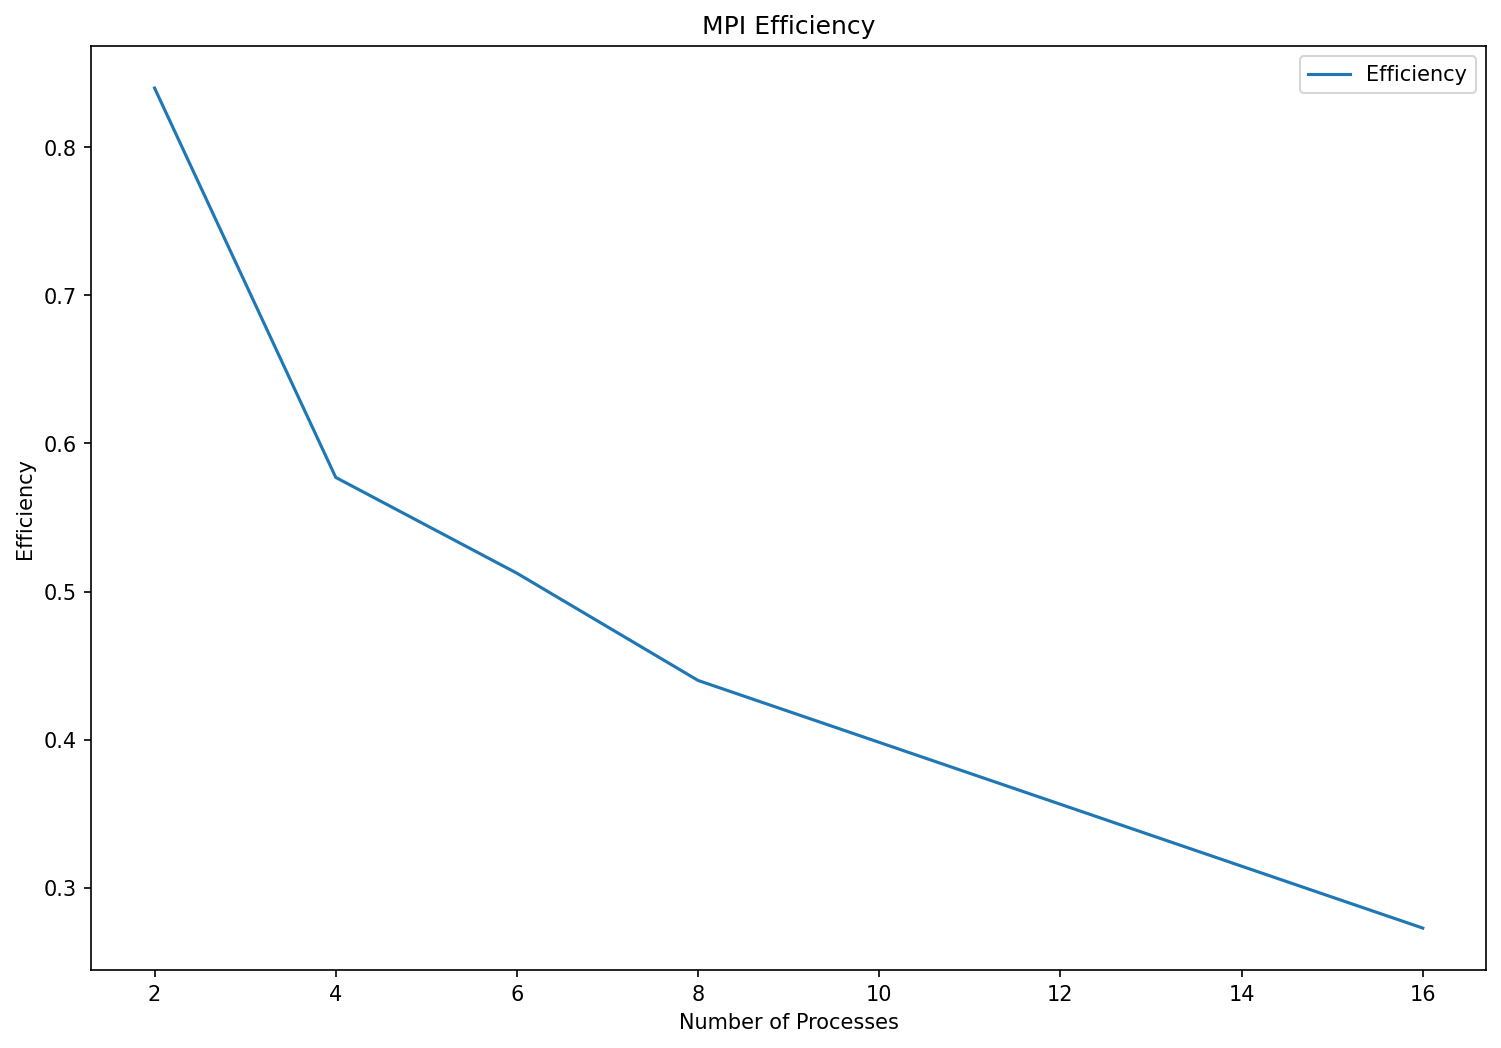

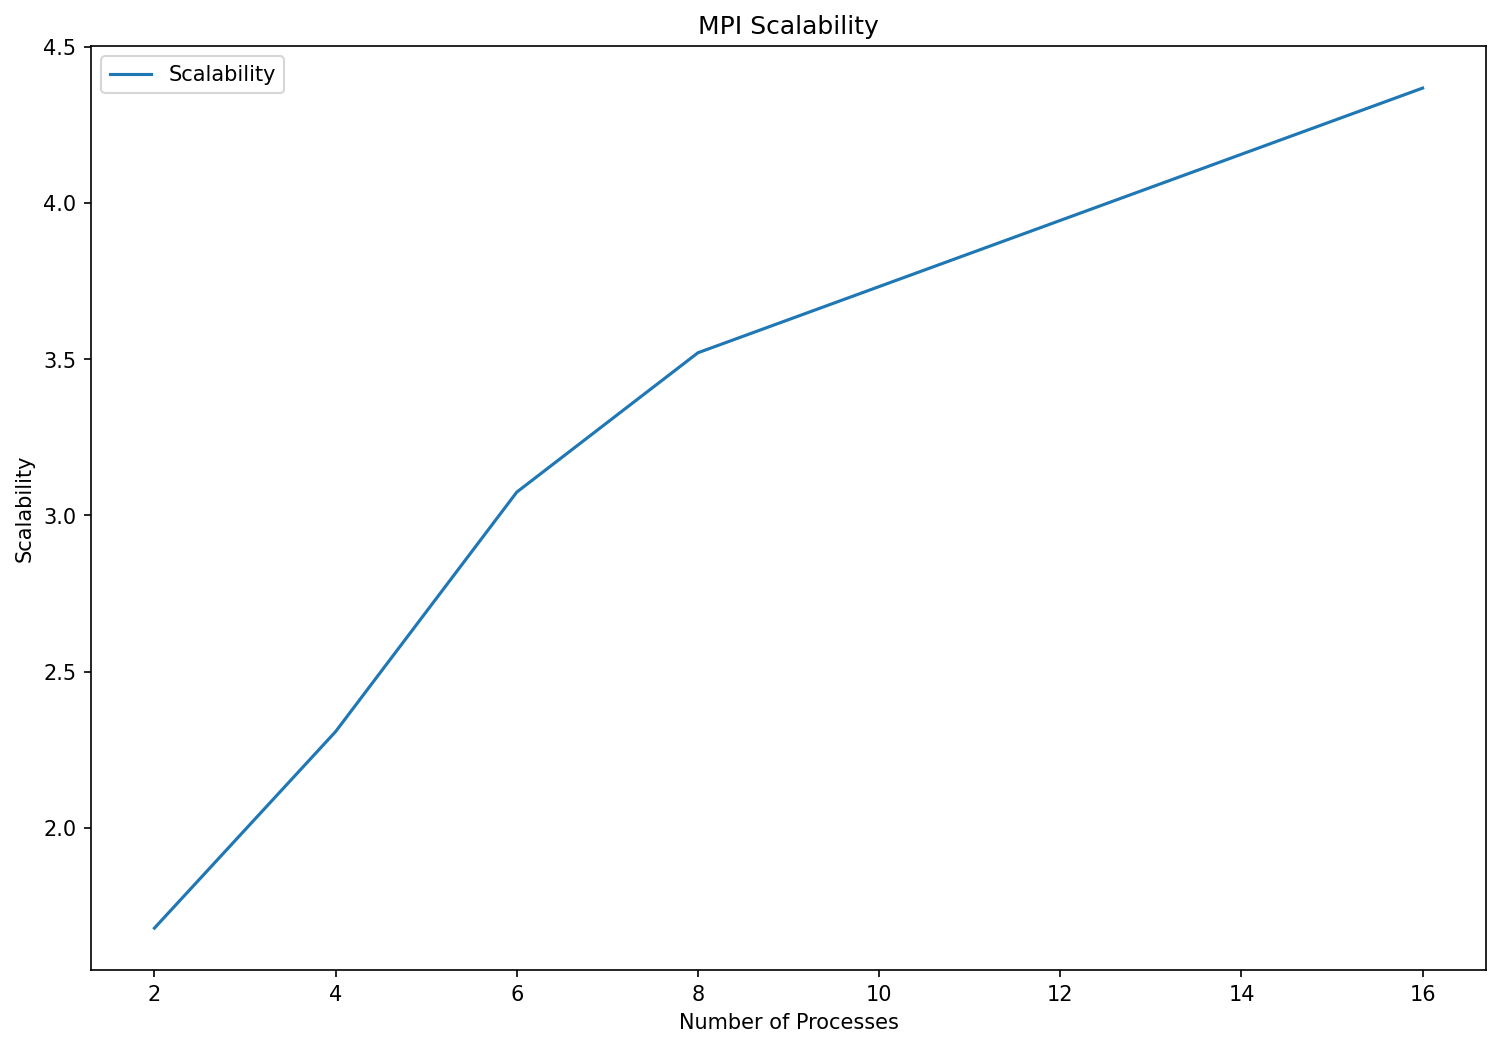

[1.6796543283880312, 2.3083788144029107, 3.0747073884418437, 3.5205737619097475, 4.367450318223146]
[0.8398271641940156, 0.5770947036007277, 0.5124512314069739, 0.44007172023871843, 0.27296564488894665]
[1.6796543283880312, 2.3083788144029107, 3.0747073884418437, 3.5205737619097475, 4.367450318223146]


In [34]:
#plot speedup, efficiency and scalability on three different plots
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)


ax.plot(processes, speedup, label='Speedup')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Speedup')
ax.set_title('MPI Speedup')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax.plot(processes, efficiency, label='Efficiency')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Efficiency')
ax.set_title('MPI Efficiency')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax.plot(processes, scalability, label='Scalability')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Scalability')
ax.set_title('MPI Scalability')
ax.legend()
plt.show()

print(speedup)
print(efficiency)
print(scalability)


In [43]:
mpihweak1 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_weak32_mpi_29132.txt'
mpihweak2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_weak64_mpi_29118.txt'
mpihweak3 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_weak96_mpi_29114.txt'
mpihweak4 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_weak128_mpi_29113.txt'
mpihweak5 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/new/output_weak256_mpi_29109.txt'

mpiweak1 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_weak32_mpirr_22717.txt'
mpiweak2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_weak64_mpirr_22746.txt'
mpiweak3 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_weak96_mpirr_22742.txt'
mpiweak4 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_weak128_mpirr_22749.txt'
mpiweak5 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_weak256_mpirr_22756.txt'

In [36]:
def parse_mpi_weak_files(file1, file2, file3, file4, file5):
    times = [0,0,0,0,0]
    with open(file1, 'r') as f:
        line1 = f.readlines()
    
    with open(file2, 'r') as f:
        line2 = f.readlines()
    
    with open(file3, 'r') as f:
        line3 = f.readlines()

    with open(file4, 'r') as f:
        line4 = f.readlines()

    with open(file5, 'r') as f:
        line5 = f.readlines()

    for i in range(0, len(line1)):
        if 'decompression' in line1[i]:
            continue
        elif 'compression' in line1[i] and 'decompression' not in line1[i]:
            t = int(line1[i].split(' ')[3])
            time1 = float(line1[i+1].split(' ')[2])
            time2 = float(line2[i+1].split(' ')[2])
            time3 = float(line3[i+1].split(' ')[2])
            time4 = float(line4[i+1].split(' ')[2])
            time5 = float(line5[i+1].split(' ')[2])
            time1 = round(time1, 1)
            time2 = round(time2, 1)
            time3 = round(time3, 1)
            time4 = round(time4, 1)
            time5 = round(time5, 1)
            
            times[0]  += time1
            times[1]  += time2
            times[2]  += time3
            times[3]  += time4
            times[4]  += time5

    times[0] = times[0]/3
    times[1] = times[1]/3
    times[2] = times[2]/3
    times[3] = times[3]/3
    times[4] = times[4]/3
    
    return times
            


In [45]:
test = parse_mpi_weak_files(mpiweak1, mpiweak2, mpiweak3, mpiweak4, mpiweak5)

testh = parse_mpi_weak_files(mpihweak1, mpihweak2, mpihweak3, mpihweak4, mpihweak5)

In [46]:
seq = [833.9, 1708.0, 3347.36, 5066.2, 13650]

In [47]:
test

[1779.3666666666668,
 1591.2,
 1774.1000000000001,
 2019.2666666666667,
 3292.2333333333336]

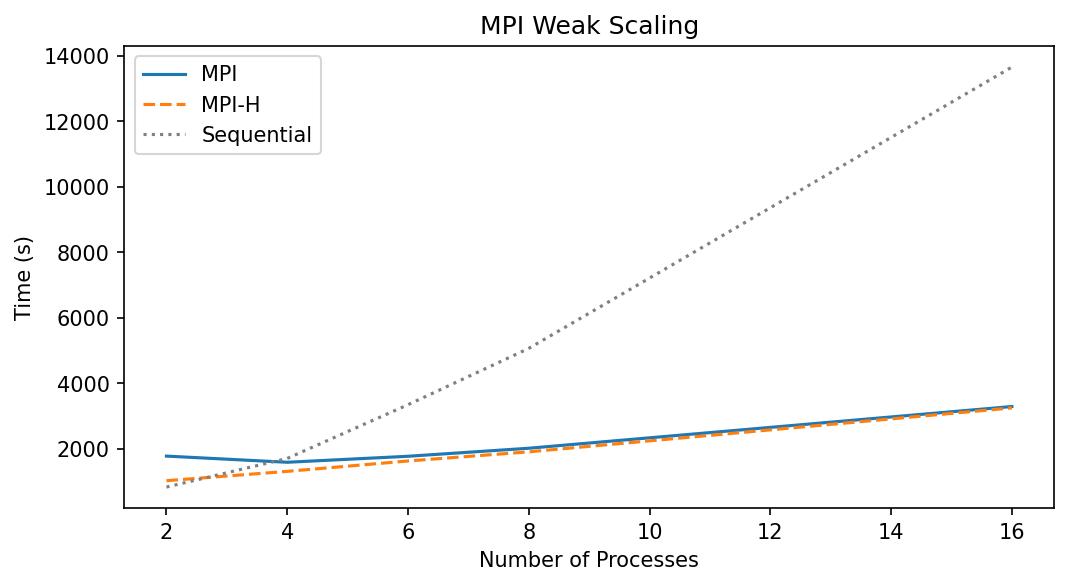

In [51]:
import matplotlib.pyplot as plt

# Assuming test, testh, and seq are defined

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Plot the lines with specified styles
ax.plot(processes, test, label='MPI', linestyle='solid')
ax.plot(processes, testh, label='MPI-H', linestyle='dashed')
ax.plot(processes, seq, label='Sequential', linestyle='dotted', color='grey')

ax.set_xlabel('Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_title('MPI Weak Scaling')
ax.legend()

plt.show()

[0.46864989415709707, 1.073403720462544, 1.8867933036469196, 2.508930634883951, 4.146121680318324]
[0.23432494707854853, 0.268350930115636, 0.31446555060781994, 0.3136163293604939, 0.25913260501989527]


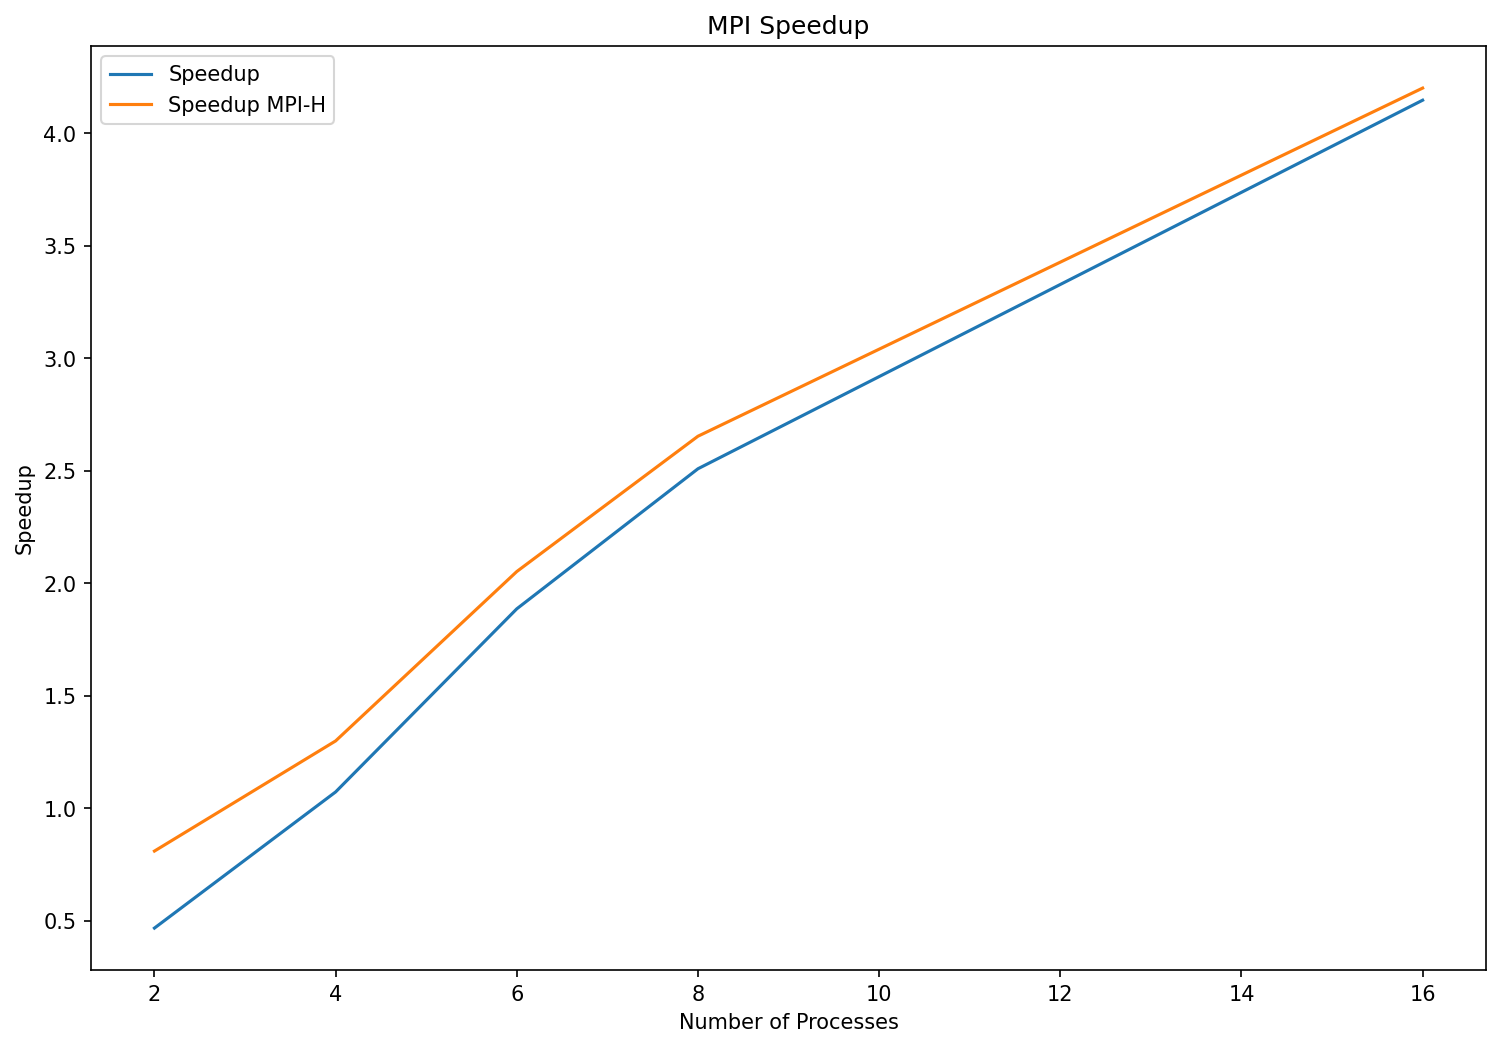

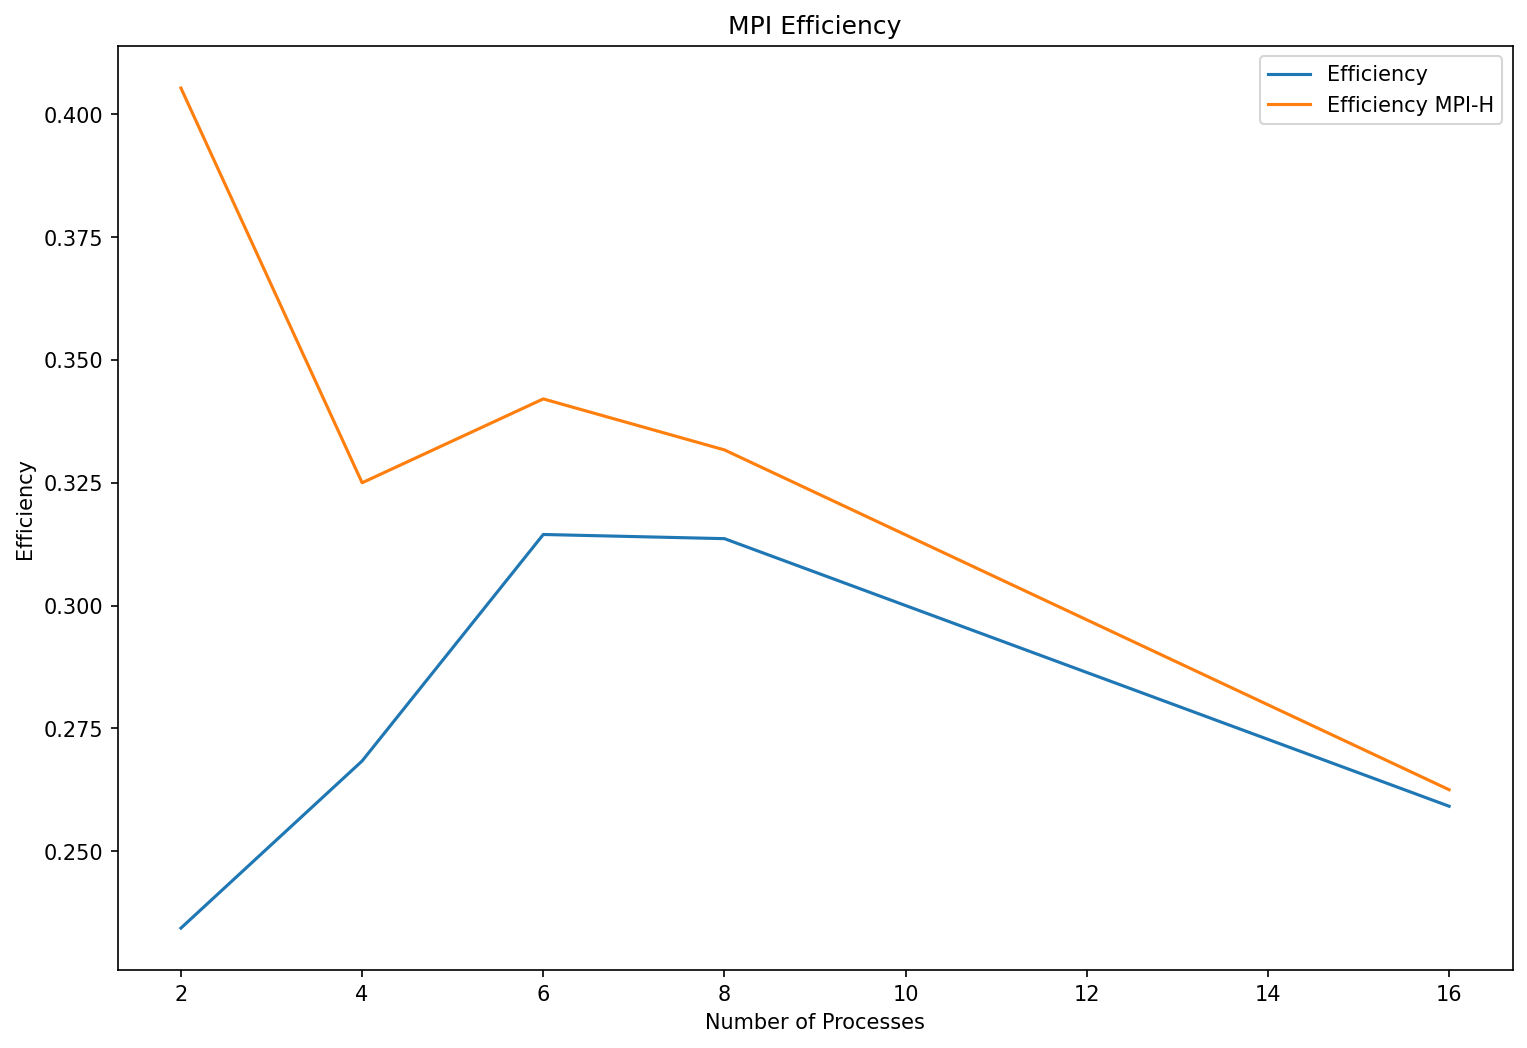

[0.46864989415709707, 1.073403720462544, 1.8867933036469196, 2.508930634883951, 4.146121680318324]
[0.23432494707854853, 0.268350930115636, 0.31446555060781994, 0.3136163293604939, 0.25913260501989527]


In [54]:
# calculate speedup and efficiency for all times, use blocksizesRR[2] as a reference for the scalability and sequential time for the sequential time
speedup = []
efficiency = []

speeduph = []
efficiencyh = []

for i in range(0, len(seq)):
    speedup.append(seq[i]/test[i])
    efficiency.append(speedup[i]/processes[i])

    speeduph.append(seq[i]/testh[i])
    efficiencyh.append(speeduph[i]/processes[i])

print(speedup)
print(efficiency)


#plot speedup and efficiency on two different plots
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)


ax.plot(processes, speedup, label='Speedup')
ax.plot(processes, speeduph, label='Speedup MPI-H')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Speedup')
ax.set_title('MPI Speedup')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax.plot(processes, efficiency, label='Efficiency')
ax.plot(processes, efficiencyh, label='Efficiency MPI-H')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Efficiency')
ax.set_title('MPI Efficiency')
ax.legend()
plt.show()




print(speedup)

print(efficiency)


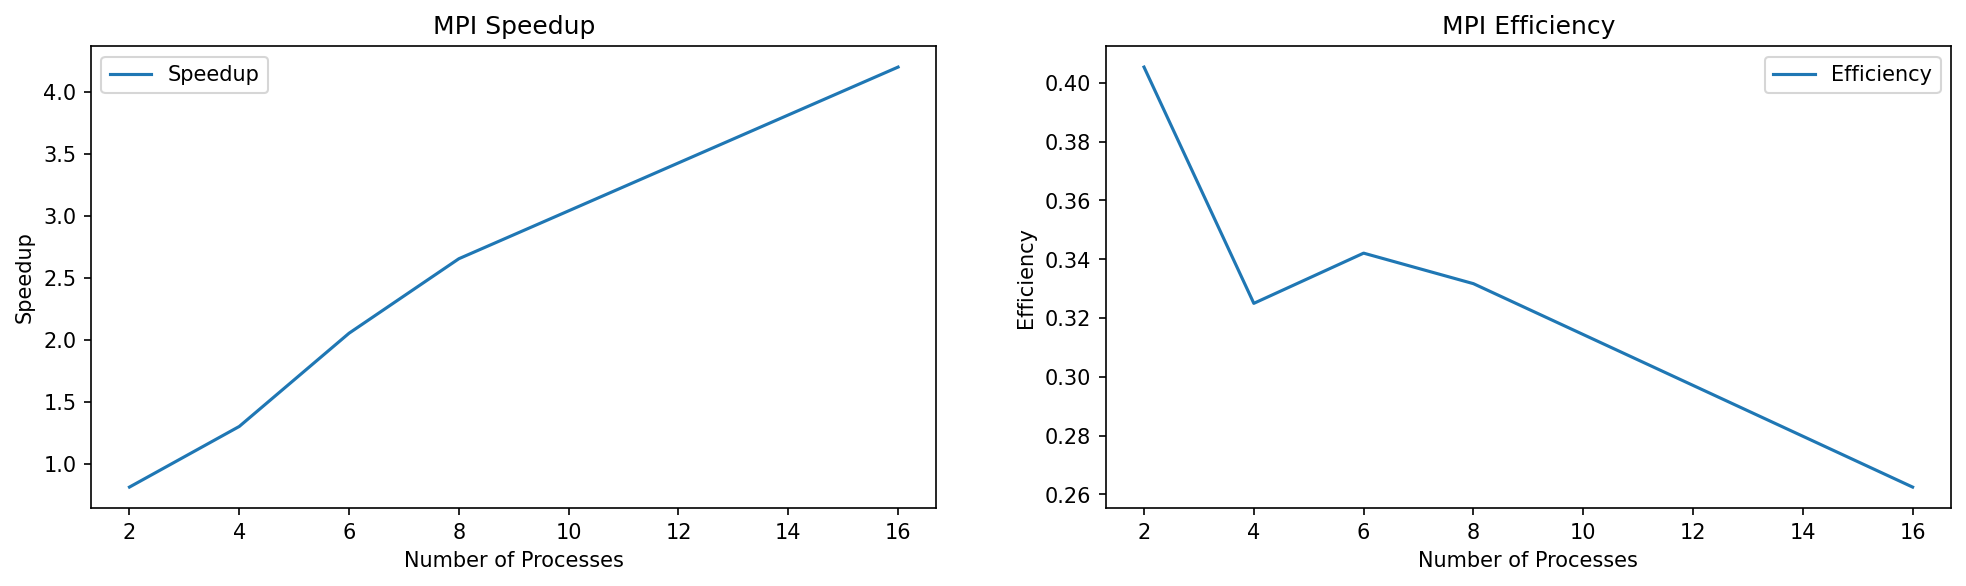

In [42]:
# put the speedup and efficiency in a 1x2 plot
fig, ax = plt.subplots(1, 2, figsize=(16, 4), dpi=150)

ax[0].plot(processes, speedup, label='Speedup')
ax[0].plot(processes, speeduph, label='Speedup MPI-H', linestyle='dashed')
ax[0].set_xlabel('Number of Processes')
ax[0].set_ylabel('Speedup')
ax[0].set_title('MPI Speedup')
ax[0].legend()

ax[1].plot(processes, efficiency, label='Efficiency')
ax[1].plot(processes, efficiencyh, label='Efficiency MPI-H', linestyle='dashed')
ax[1].set_xlabel('Number of Processes')
ax[1].set_ylabel('Efficiency')
ax[1].set_title('MPI Efficiency')
ax[1].legend()
plt.show()

